### 1) Use Random Forest to prepare a model on fraud data treating those who have taxable_income <= 30000 as    "Risky" and others are "Good"

In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [54]:
df1 = pd.read_csv("Fraud_check.csv")
df1.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [55]:
df1['Income_Category'] = pd.cut(df1['Taxable.Income'], bins=[0, 30000, float('inf')], labels=['Risky', 'Good'])

In [56]:
x = df1.drop(['Taxable.Income', 'Income_Category'], axis=1)
y = df1['Income_Category']

In [57]:
x = pd.get_dummies(x, columns=['Undergrad', 'Marital.Status', 'Urban'], drop_first=True)

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [59]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [60]:
y_pred = rf_model.predict(x_test)

In [61]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7333333333333333

In [62]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        Good       0.77      0.94      0.85        94
       Risky       0.00      0.00      0.00        26

    accuracy                           0.73       120
   macro avg       0.39      0.47      0.42       120
weighted avg       0.60      0.73      0.66       120



In [70]:
print(confusion_matrix(y_test, y_pred))

[[88  6]
 [26  0]]


In [64]:
feature_importance = rf_model.feature_importances_
features = x.columns
feature_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

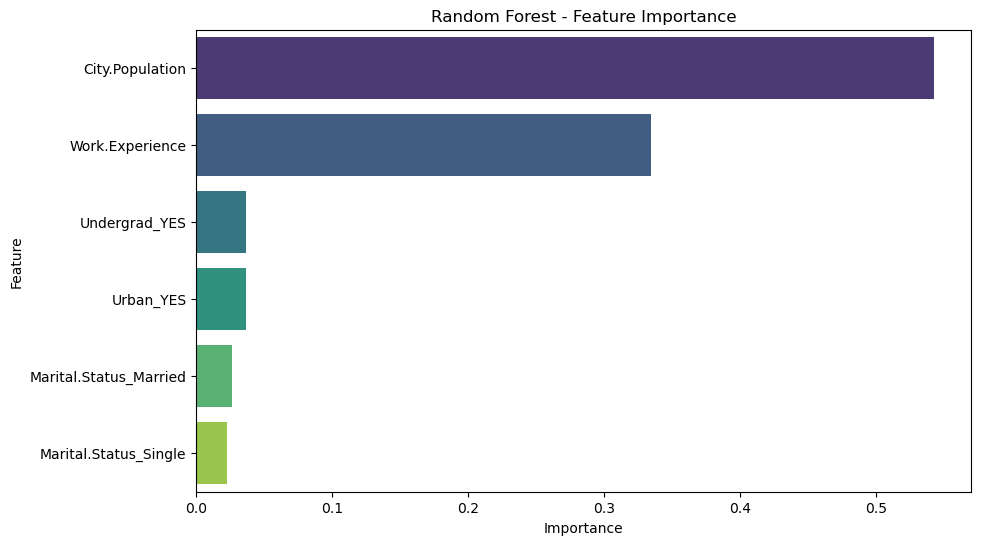

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df, palette='viridis')
plt.title('Random Forest - Feature Importance')
plt.show()


In [71]:
cm = confusion_matrix(y_test, y_pred)

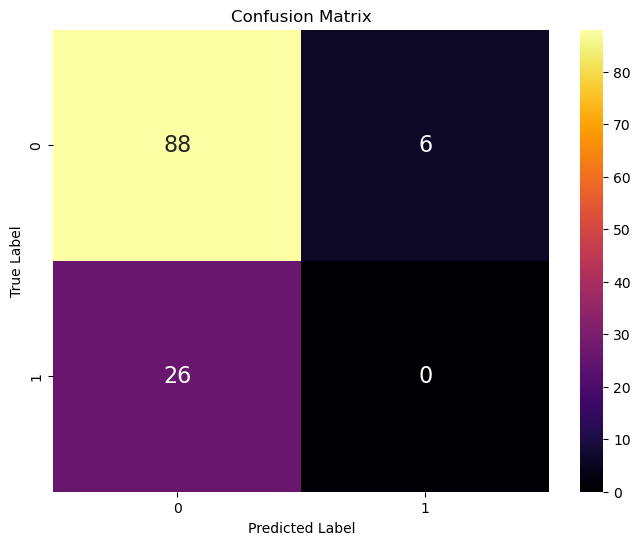

In [77]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='inferno', annot_kws={"size": 16})
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


### 2) A cloth manufacturing company is interested to know about the segment or attributes causes high sale. Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


In [16]:
df2 = pd.read_csv("Company_Data.csv")
df2.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [17]:
df2['Sales_Category'] = pd.qcut(df2['Sales'], q=3, labels=['Low', 'Medium', 'High'])

In [18]:
x = df2.drop(['Sales', 'Sales_Category'], axis=1)
y = df2['Sales_Category']

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x['ShelveLoc'] = le.fit_transform(x['ShelveLoc'])
x['Urban'] = le.fit_transform(x['Urban'])
x['US'] = le.fit_transform(x['US'])

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [21]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [43]:
feature_importance = rf_model.feature_importances_

In [45]:
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

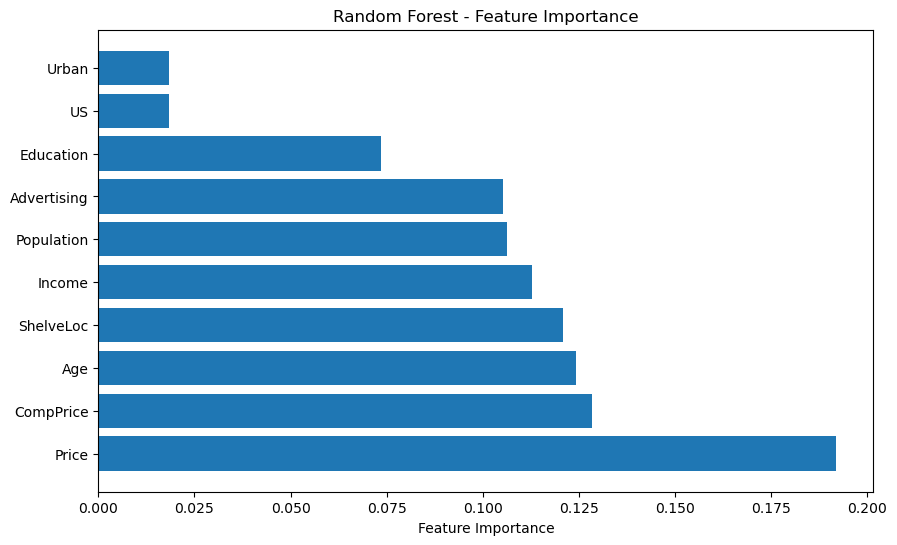

In [46]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Random Forest - Feature Importance')
plt.show()

In [47]:
y_pred = rf_model.predict(x_test)

In [48]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.6125

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        High       0.74      0.72      0.73        32
         Low       0.70      0.62      0.65        26
      Medium       0.38      0.45      0.42        22

    accuracy                           0.61        80
   macro avg       0.61      0.60      0.60        80
weighted avg       0.63      0.61      0.62        80



In [50]:
print(confusion_matrix(y_test, y_pred))

[[23  3  6]
 [ 0 16 10]
 [ 8  4 10]]


In [51]:
cm = confusion_matrix(y_test, y_pred)

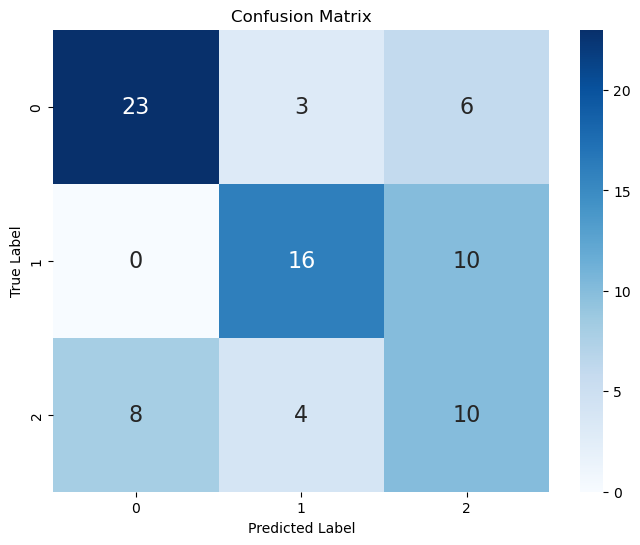

In [52]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()